---
title: "PSY9511 Assignment 2"
# author: "Qi Qin"
# date: "2025-02-28"
# format:
#  html:
#    embed-resources: true
#    toc: true
#    toc-location: left
#editor: source
---

# Exercise 1: Preparation
## 1. Download the dataset
## 2. Read in the dataset

In [254]:
import pandas as pd
import numpy as np
Auto=pd.read_csv("Auto.csv")
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
393,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
394,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
395,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


## 3. In the horsepower column, some values are missing. These are encoded with ‘?’. Remove these rows from the dataset.

In [87]:
#remove the rows that contain ?
Auto=Auto[Auto['horsepower']!='?']
Auto['horsepower']

0      130
1      165
2      150
3      150
4      140
      ... 
392     86
393     52
394     84
395     79
396     82
Name: horsepower, Length: 392, dtype: object

## 4. Create a new column ‘muscle’. This column should contain a 1 for all muscle cars (e.g. cars that have above average horsepower) and 0 for the rest. (HINT: To help you out I have calculated that the mean horsepower is 104.46. After creating the column you should end up with approximately 148 muscle cars and 244 others (assuming that you have already removed the rows with horsepower=’?’ above)).

In [88]:
#check the type of horsepower variable
type(Auto['horsepower'])

pandas.core.series.Series

In [89]:
#change it to decimals
Auto['horsepower']=Auto['horsepower'].astype(float)

/var/folders/sx/vwqvh81108b_mls63cm7cgcw0000gp/T/ipykernel_40414/3831349990.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Auto['horsepower']=Auto['horsepower'].astype(float)


In [90]:
#create muscle column with a value of 0
Auto['muscle']=0
Auto

/var/folders/sx/vwqvh81108b_mls63cm7cgcw0000gp/T/ipykernel_40414/791588006.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Auto['muscle']=0


,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,muscle
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,0
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,0
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,0
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,0
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,0
...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl,0
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup,0
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage,0
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger,0


In [91]:
# set the muscle to 1 where the corresponding row of horsepower is larger than 104.46
Auto.loc[Auto['horsepower'] > 104.46, 'muscle'] = 1
Auto

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,muscle
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu,1
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,1
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite,1
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst,1
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino,1
...,...,...,...,...,...,...,...,...,...,...
392,27.0,4,140.0,86.0,2790,15.6,82,1,ford mustang gl,0
393,44.0,4,97.0,52.0,2130,24.6,82,2,vw pickup,0
394,32.0,4,135.0,84.0,2295,11.6,82,1,dodge rampage,0
395,28.0,4,120.0,79.0,2625,18.6,82,1,ford ranger,0


In [92]:
#check the number of rows with 1
Auto['muscle'].sum()

148

In [93]:
#check the number of rows with 0
len(Auto[Auto['muscle'] == 0])


244

## 5. Split the dataset into a training set and a test set, by randomly drawing 80% of the rows for the former and 20% of the rows for the latter.

In [95]:
len(Auto)

392

In [166]:
Auto.index.to_numpy

<bound method IndexOpsMixin.to_numpy of Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       387, 388, 389, 390, 391, 392, 393, 394, 395, 396],
      dtype='int64', length=392)>

In [173]:
Auto.index

Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
       ...
       387, 388, 389, 390, 391, 392, 393, 394, 395, 396],
      dtype='int64', length=392)

In [268]:
# separating manually
# random number of 80% of the rows
import numpy as np
seed = np.random.default_rng(1111) # set random number
random_number = seed.choice(Auto.index, size = int(len(Auto)*0.8),replace=False) # choose 80% row indices randomly


In [184]:
# extract these rows based on the random number 
training_set = Auto.loc[random_number] 
training_set

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,muscle
225,17.5,6,250.0,110.0,3520,16.4,77,1,chevrolet concours,1
248,36.1,4,91.0,60.0,1800,16.4,78,3,honda civic cvcc,0
81,28.0,4,97.0,92.0,2288,17.0,72,3,datsun 510 (sw),0
60,20.0,4,140.0,90.0,2408,19.5,72,1,chevrolet vega,0
375,37.0,4,91.0,68.0,2025,18.2,82,3,mazda glc custom l,0
...,...,...,...,...,...,...,...,...,...,...
273,23.9,4,119.0,97.0,2405,14.9,78,3,datsun 200-sx,0
134,16.0,6,258.0,110.0,3632,18.0,74,1,amc matador,1
100,18.0,6,250.0,88.0,3021,16.5,73,1,ford maverick,0
300,23.9,8,260.0,90.0,3420,22.2,79,1,oldsmobile cutlass salon brougham,0


In [186]:
#extracting the rest of the rows
test_set = Auto.drop(random_number)
test_set

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,muscle
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,1
6,14.0,8,454.0,220.0,4354,9.0,70,1,chevrolet impala,1
8,14.0,8,455.0,225.0,4425,10.0,70,1,pontiac catalina,1
14,24.0,4,113.0,95.0,2372,15.0,70,3,toyota corona mark ii,0
15,22.0,6,198.0,95.0,2833,15.5,70,1,plymouth duster,0
...,...,...,...,...,...,...,...,...,...,...
362,24.2,6,146.0,120.0,2930,13.8,81,3,datsun 810 maxima,1
365,20.2,6,200.0,88.0,3060,17.1,81,1,ford granada gl,0
371,29.0,4,135.0,84.0,2525,16.0,82,1,dodge aries se,0
390,36.0,4,135.0,84.0,2370,13.0,82,1,dodge charger 2.2,0


In [203]:
# extacting training and test set via function
from sklearn.model_selection import train_test_split
training_set, test_set = train_test_split(Auto, test_size=0.2, random_state=1111)

In [204]:
training_set

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,muscle
214,13.0,8,302.0,130.0,3870,15.0,76,1,ford f108,1
334,23.7,3,70.0,100.0,2420,12.5,80,3,mazda rx-7 gs,0
84,27.0,4,97.0,88.0,2100,16.5,72,3,toyota corolla 1600 (sw),0
60,20.0,4,140.0,90.0,2408,19.5,72,1,chevrolet vega,0
277,16.2,6,163.0,133.0,3410,15.8,78,2,peugeot 604sl,1
...,...,...,...,...,...,...,...,...,...,...
182,28.0,4,107.0,86.0,2464,15.5,76,2,fiat 131,0
164,21.0,6,231.0,110.0,3039,15.0,75,1,buick skyhawk,1
341,23.5,6,173.0,110.0,2725,12.6,81,1,chevrolet citation,1
231,15.5,8,400.0,190.0,4325,12.2,77,1,chrysler cordoba,1


In [206]:
test_set

,mpg,cylinders,displacement,horsepower,weight,acceleration,year,origin,name,muscle
300,23.9,8,260.0,90.0,3420,22.2,79,1,oldsmobile cutlass salon brougham,0
211,16.5,6,168.0,120.0,3820,16.7,76,2,mercedes-benz 280s,1
135,18.0,6,225.0,105.0,3613,16.5,74,1,plymouth satellite sebring,1
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320,1
134,16.0,6,258.0,110.0,3632,18.0,74,1,amc matador,1
...,...,...,...,...,...,...,...,...,...,...
174,18.0,6,171.0,97.0,2984,14.5,75,1,ford pinto,0
12,15.0,8,400.0,150.0,3761,9.5,70,1,chevrolet monte carlo,1
224,15.0,8,302.0,130.0,4295,14.9,77,1,mercury cougar brougham,1
26,10.0,8,307.0,200.0,4376,15.0,70,1,chevy c20,1


# Exercise 2: Simple linear regression
## 1. Fit a simple linear regression model using horsepower as the predictor and mpg as the outcome using the training data. 

In [212]:
from sklearn.linear_model import LinearRegression
linear_model = LinearRegression()
linear_model.fit(training_set[['horsepower']],training_set[['mpg']])

LinearRegression()

## 2. Create a scatter plot with horsepower on the x-axis and mpg on the y-axis using the testing data. Plot the regression line found by the model in the plot (Hint: To achieve this you need to find the intercept and the single coefficient of the model, generate predictions or use built-in plotting functionality).

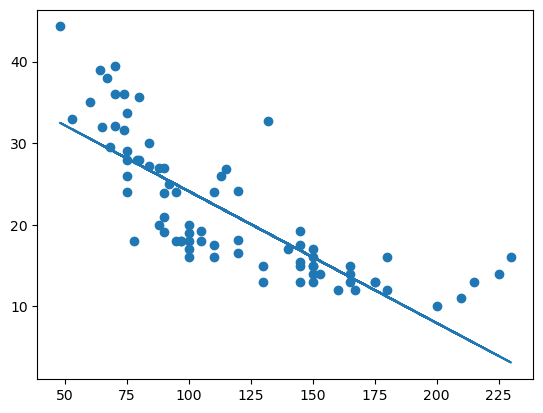

In [222]:
import matplotlib.pyplot as plt
plt.scatter(test_set[['horsepower']], test_set[['mpg']])
plt.plot(test_set[['horsepower']], linear_model.predict(test_set[['horsepower']]))

## 3. Use the model to generate predictions for the training set. Calculate and report the mean absolute error (MAE) of these predictions.


In [227]:
#predictions for the training set
mpg_predictions_training = linear_model.predict(training_set[['horsepower']])

In [228]:
# mean absolute error
from sklearn.metrics import mean_absolute_error
mean_absolute_error(training_set[['mpg']], mpg_predictions_training)

3.768227977255236

The mean absolute error is 3.77 of these predictions is approximately 3.77. # How to interpret this value? Is 3.77 an indicator of a good fit? Are there any rule of thumbs to infer from the MAE

## 4. Use the model to generate predictions for the test set. Calculate and report the MAE of the predictions.

In [229]:
mpg_predictions_test = linear_model.predict(test_set[['horsepower']])
mean_absolute_error(test_set[['mpg']],mpg_predictions_test)

4.001171262777924

The mean absolute error is around 4 for the test set.

## 5. Reflection: Is the training or testing MAE is lower? Does this match your expectation? What would be the general pattern we expect here (e.g. one is lower than the other, they are the same, ...), and why do we expect that?

The training MAE is slightly lower, and this matches my expectations. Because the model learns from the training set, it is expected to have a better fit of the training data. However due to over fitting, the model learned from the training set is not necessarily generalizing well to the test set, thus the test MAE is higher. 

# Exercise 3: Multivariate linear regression
## 1. Fit a multivariate linear regression model using horsepower, weight, displacement, and year as predictors and mpg as the outcome.

In [237]:
m_linear_model = LinearRegression()
m_linear_model.fit(training_set[['horsepower', 'weight', 'displacement', 'year']],training_set[['mpg']])

LinearRegression()

## 2. Print the intercept and coefficients of the model (these should be identifiable such that I’m able to deduce which coefficient belongs to which variable). What can you say about the relationship between mpg and the year-variable based on these?

In [238]:
# print the intercept 
print(f"Intercept: {m_linear_model.intercept_[0]:.4f}")

Intercept: -12.9012


In [241]:
# print the coefficients 
feature_names = ['horsepower', 'weight', 'displacement', 'year']
coefficients = m_linear_model.coef_[0]  # Extract coefficients as an array

print("\nModel Coefficients:")
for feature, coef in zip(feature_names, coefficients):
    print(f"{feature}: {coef:.4f}")


Model Coefficients:
horsepower: -0.0128
weight: -0.0071
displacement: 0.0071
year: 0.7542


The mpg is positively correlated with the year variable with a coefficient of .7542. This indicates that when the weight, displacement, and the horsepower are the same, 1 year increase in the cars, the mpg increases .7542.

## 3. Use the model to generate predictions for the training set. Calculate and report the MAE of these predictions.

In [246]:
pre_training = m_linear_model.predict(training_set[['horsepower', 'weight', 'displacement', 'year']])
mean_absolute_error(training_set[['mpg']],pre_training)

2.6839719824436243

## 4. Use the model to generate predictions for the test set. Calculate and report the MAE of the predictions.

In [251]:
pre_test = m_linear_model.predict(test_set[['horsepower', 'weight', 'displacement', 'year']])
mean_absolute_error(test_set[['mpg']],pre_test)

2.4441313937082585

## 5. Reflection: Is the training MAE lower or higher than in the simple linear regression model? Does it have to be this way, or could it have been otherwise? What about the testing MAE?

The training MAE is lower than in the simple linear regression model because it fitted more variables in the model to better capture the data relationship. It doesn't have to be this way, and it could have a higher MAE than in the simple linear regression model if the variables we included are irrelevant to the relationship. In this way, the variables introduced more noise in the model, leading to overfitting. 
The testing MAE is also lower than in the simple linear regression. However,the test MAE could be even higher than the simple linear model when the multivariate test set is overfitting. 

# Exercise 4: Logistic regression
## 1.Fit a logistic regression model using weight, displacement and year as predictors and our newly created muscle-column as the outcome. Why don’t we use horsepower as a predictor in this model?

In [258]:
# define the model
from sklearn.linear_model import LogisticRegression
log_model = LogisticRegression()
log_model.fit(training_set[['weight', 'displacement', 'year']],training_set[['muscle']])

/Users/qiqi/miniforge3/envs/python-for-scicomp/lib/python3.12/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

We don't use the horsepower to avoid the collinearity. The muscle column is created based on the horsepower, meaning these two variables are highly correlated. 

## 2. Use the model to generate predictions for the training set. Calculate and report the accuracy of these predictions.

In [264]:
from sklearn.metrics import accuracy_score
log_predict = log_model.predict(training_set[['weight', 'displacement', 'year']])

In [265]:
accuracy_score(training_set[['muscle']], log_predict)

0.8753993610223643

In [269]:
from sklearn.metrics import confusion_matrix
confusion_matrix(training_set[['muscle']], log_predict)

array([[187,  18],
       [ 21,  87]])

The accuracy of these predictions is 0.88, indicating the model is performing relatively well. 

## 3. Use the model to generate predictions for the testing set. Calculate and report the accuracy of these predictions.

In [267]:
log_test_predict = log_model.predict(test_set[['weight', 'displacement', 'year']])
accuracy_score(test_set[['muscle']], log_test_predict)

0.8481012658227848

In [270]:
confusion_matrix(test_set[['muscle']], log_test_predict)

array([[32,  7],
       [ 5, 35]])

The accuracy of the model on the test set is 0.85, indicating a relatively good model performance as well. 